In [1]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('baseball_data_2005.csv')
df

,First Name,Last Name,Pitcher?,Season AB,AB(4),AB(5),AB(6),AB(7),AB(8),AB(9-10),H(4),H(5),H(6),H(7),H(8),H(9-10)
0,Brent,Abernathy,0,67,0,0,18,1,34,14,0,0,5,0,8,3
1,Bobby,Abreu,0,588,88,96,103,98,100,103,23,38,29,21,32,25
2,Jeremy,Accardo,1,2,0,0,0,0,0,2,0,0,0,0,0,1
3,Jose,Acevedo,1,8,0,0,0,1,6,1,0,0,0,0,1,0
4,Russ,Adams,0,481,55,67,68,79,104,108,12,17,17,26,28,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Carlos,Zambrano,1,80,14,13,8,14,15,16,5,2,1,4,4,8
925,Victor,Zambrano,1,53,10,8,7,10,12,6,2,2,0,1,2,0
926,Gregg,Zaun,0,434,70,49,78,79,80,78,20,13,20,22,19,15
927,Barry,Zito,1,7,0,3,4,0,0,0,0,0,1,0,0,0


In [3]:
#MLE = total number of hits/total number of attempts
N = df['Season AB']     #total number of attempts
H = df['H(4)'] + df['H(5)'] + df['H(6)'] + df['H(7)'] + df['H(8)'] + df['H(9-10)']  #total number of hits
theta = H/N                     #probability of hit = batting average = MLE
MLE = theta
MLE

0      0.238806
1      0.285714
2      0.500000
3      0.125000
4      0.255717
         ...   
924    0.300000
925    0.132075
926    0.251152
927    0.142857
928    0.396552
Length: 929, dtype: float64

In [4]:
#Using the Beta(100, 300) distribution as the prior distribution, MAP = (Ho+H)/(Ho+Mo+N)
Ho = 100
Mo = 300

MAP = (H+Ho)/(N+Ho+Mo)
MAP

0      0.248394
1      0.271255
2      0.251244
3      0.247549
4      0.253121
         ...   
924    0.258333
925    0.236203
926    0.250600
927    0.248157
928    0.268559
Length: 929, dtype: float64

In [5]:
#comparison between MLE and MAP for all individual players
df = pd.DataFrame(columns = ['MLE estimate', 'MAP estimate'])
df['MLE estimate'] = MLE

df['MAP estimate'] = MAP
df

,MLE estimate,MAP estimate
0,0.238806,0.248394
1,0.285714,0.271255
2,0.500000,0.251244
3,0.125000,0.247549
4,0.255717,0.253121
...,...,...
924,0.300000,0.258333
925,0.132075,0.236203
926,0.251152,0.250600
927,0.142857,0.248157


# Comments: The above comparison shows that the variance in MLE is high and is spread over range(0, 1) whereas
# in MAP the variance is confined to the range(0.22, 0.3). This shows that, for this dataset, MAP gives a better estimation
# of hit probability for the players with the prior distribution which avoids over-ftting whereas in MLE there is much uncertainity which results in over-fitting.
# MAP provides regularization by using prior values to avoid over-fitting. Also, there are negligible outliers observed in MAP compared to MLE.
# The uncertainity in the values of MLE and MAP is shown below in the graph.

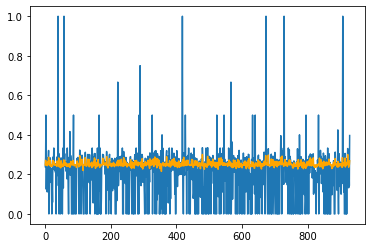

In [6]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(MLE)
ax.plot(MAP, color = 'orange')